In [18]:
import time
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from keras import optimizers
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [2]:
df = pd.read_csv("pulsar_stars.csv", header=0)

In [3]:
#check dataframe head 
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
#checking for null values 
df.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [5]:
#descriptive statistics 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
#check for outliers 
# sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [7]:
#prepare data for training; drops target, train-test split 
X = df.drop('target_class', axis = 1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
print(scaled_X_train.shape, scaled_X_test.shape)


(16108, 8) (1790, 8)


In [8]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Baseline Model

In [9]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
forest.score(X_train, y_train)

0.9813136329774025

In [55]:
forest.score(X_test, y_test)

0.9720670391061452

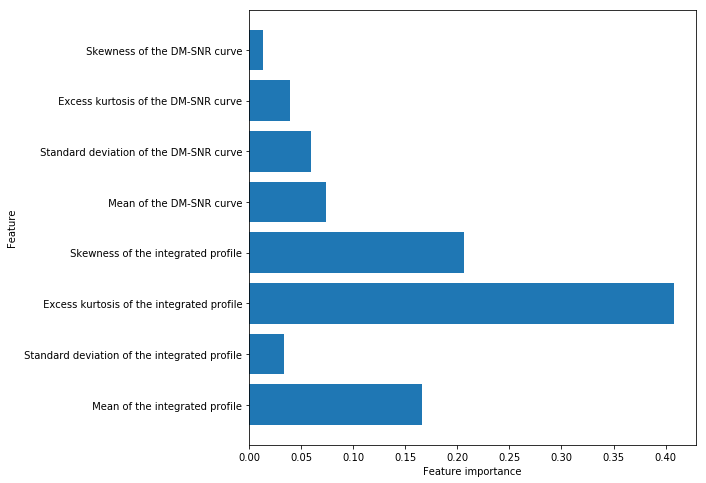

In [56]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(forest)

In [32]:
# pred = forest.predict(X_test)
# print confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
# # print(classification_report(y_test, pred))

# Neural Network 

In [33]:
#building the neural network 
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_dim = 8)) #2 hidden layers
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

#compile model 
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#training the network 
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=32)

Epoch 1/30
16108/16108 [==============================] - 1s 59us/step - loss: 0.2274 - acc: 0.9125
Epoch 2/30
16108/16108 [==============================] - 1s 48us/step - loss: 0.1477 - acc: 0.9212
Epoch 3/30
16108/16108 [==============================] - 1s 39us/step - loss: 0.1176 - acc: 0.9593: 0s - loss: 0.1250 - acc: 
Epoch 4/30
16108/16108 [==============================] - 1s 36us/step - loss: 0.0966 - acc: 0.9725
Epoch 5/30
16108/16108 [==============================] - 1s 36us/step - loss: 0.0933 - acc: 0.9726
Epoch 6/30
16108/16108 [==============================] - 1s 38us/step - loss: 0.0928 - acc: 0.9735
Epoch 7/30
16108/16108 [==============================] - 1s 39us/step - loss: 0.0900 - acc: 0.9737
Epoch 8/30
16108/16108 [==============================] - 1s 39us/step - loss: 0.0888 - acc: 0.9739
Epoch 9/30
16108/16108 [==============================] - 1s 49us/step - loss: 0.0887 - acc: 0.9744
Epoch 10/30
16108/16108 [==============================] - 1s 40us/step -

In [36]:
#neural network with softmax activation holding other parameters constant 
model_1= models.Sequential()
model_1.add(layers.Dense(50, activation='relu', input_dim = 8)) #2 hidden layers
model_1.add(layers.Dense(50, activation='relu'))
model_1.add(layers.Dense(2, activation='sigmoid'))

#compile model 
model_1.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

#training the network 
history_1 = model_1.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=32)

Epoch 1/30
16108/16108 [==============================] - 1s 76us/step - loss: 0.1012 - acc: 0.9439: 0s - loss: 0.1334 - acc: 0
Epoch 2/30
16108/16108 [==============================] - 1s 47us/step - loss: 0.0244 - acc: 0.9739
Epoch 3/30
16108/16108 [==============================] - 1s 41us/step - loss: 0.0233 - acc: 0.9749
Epoch 4/30
16108/16108 [==============================] - 1s 42us/step - loss: 0.0254 - acc: 0.9734
Epoch 5/30
16108/16108 [==============================] - 1s 39us/step - loss: 0.0247 - acc: 0.9739
Epoch 6/30
16108/16108 [==============================] - 1s 40us/step - loss: 0.0249 - acc: 0.9734
Epoch 7/30
16108/16108 [==============================] - 1s 40us/step - loss: 0.0246 - acc: 0.9741
Epoch 8/30
16108/16108 [==============================] - 1s 40us/step - loss: 0.0236 - acc: 0.9750
Epoch 9/30
16108/16108 [==============================] - 1s 51us/step - loss: 0.0235 - acc: 0.9754
Epoch 10/30
16108/16108 [==============================] - 1s 48us/step 

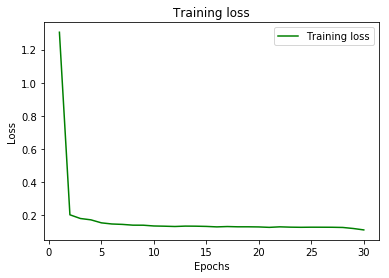

In [62]:
#ploting the results 

history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

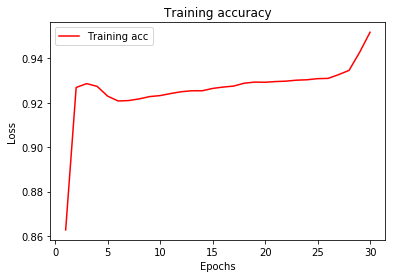

In [63]:
acc_values = history_dict['acc'] 
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
# model.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=50, batch_size=32)

In [64]:
#classification report 
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_bool))

1790/1790 [==============================] - 0s 62us/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1621
           1       0.96      0.53      0.68       169

   micro avg       0.95      0.95      0.95      1790
   macro avg       0.96      0.77      0.83      1790
weighted avg       0.95      0.95      0.95      1790



# Optimizing Model 

In [11]:
lr_to_test = [.000001, 0.01, 1]

In [12]:
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = Sequential()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD()
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001



NameError: name 'get_new_model' is not defined

In [ ]:
# earlystopping - stop training if our models aren't improving
# patience - how many epoches models can keep running until we stop the training
from keras.callbacks import EarlyStopping
n = 2
stopping_monitor = EarlyStopping(patience = n)

In [20]:
# model capacity - overfitting and underfitting 

# specifying the model structure
model = Sequential()

# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(50))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'num_classes' is not defined

In [21]:
tic = time.time()
model = Sequential()
# specify the first hidden layer
model.add(Dense(50, activation='relu', input_dim =8))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(50))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
toc = time.time()

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('run time:',toc-tic)


NameError: name 'num_classes' is not defined

In [22]:
tic = time.time()
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
toc = time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('run time:', toc-tic)

NameError: name 'num_classes' is not defined